# Lab 10

_[General notebook information](https://computing-in-context.afeld.me/notebooks.html)_

We are going to look at the population count of different community districts over time.

## Step 0

Read the data from the [New York City Population By Community Districts](https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Community-Districts/xi7c-iiu2/data) data set into a DataFrame called `pop_by_cd`. To get the URL:

1. Visit the page linked above.
1. Click `Export`.
1. Right-click `CSV`.
1. Click `Copy Link Address` (or `Location`, depending on your browser).

In [1]:
import pandas as pd
pop_by_cd = pd.read_csv("/Users/chuhanzou/Desktop/lab10/New_York_City_Population_By_Community_Districts.csv")
pop_by_cd

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200
5,Bronx,6,"East Tremont, Belmont",114137,65016,68061,75688,83268
6,Bronx,7,"Bedford Park, Norwood, Fordham",113764,116827,128588,141411,139286
7,Bronx,8,"Riverdale, Kingsbridge, Marble Hill",103543,98275,97030,101332,101731
8,Bronx,9,"Soundview, Parkchester",166442,167627,155970,167859,172298
9,Bronx,10,"Throgs Nk., Co-op City, Pelham Bay",84948,106516,108093,115948,120392


## Step 1

Prepare the data. Use the following code to [reshape](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#melt-and-wide-to-long) the DataFrame to have one row per community district per Census year.

In [55]:
# turn the population columns into rows
populations = pd.melt(
    pop_by_cd,
    id_vars=["Borough", "CD Number", "CD Name"],
    var_name="year",
    value_name="population",
)

# turn the years into numbers
populations.year = populations.year.str.replace(" Population", "").astype(int)

populations

,Borough,CD Number,CD Name,year,population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",1970,138557
1,Bronx,2,"Hunts Point, Longwood",1970,99493
2,Bronx,3,"Morrisania, Crotona Park East",1970,150636
3,Bronx,4,"Highbridge, Concourse Village",1970,144207
4,Bronx,5,"University Hts., Fordham, Mt. Hope",1970,121807
...,...,...,...,...,...
290,Queens,13,"Queens Village, Rosedale",2010,188593
291,Queens,14,"The Rockaways, Broad Channel",2010,114978
292,Staten Island,1,"Stapleton, Port Richmond",2010,175756
293,Staten Island,2,"New Springville, South Beach",2010,132003


In [7]:
pd2 = populations[(populations["CD Name"] == "Melrose, Mott Haven, Port Morris") | (populations["CD Name"] == "Hunts Point, Longwood")]
pd2.sort_values(["CD Name", "year"])

,Borough,CD Number,CD Name,year,population
1,Bronx,2,"Hunts Point, Longwood",1970,99493
60,Bronx,2,"Hunts Point, Longwood",1980,34399
119,Bronx,2,"Hunts Point, Longwood",1990,39443
178,Bronx,2,"Hunts Point, Longwood",2000,46824
237,Bronx,2,"Hunts Point, Longwood",2010,52246
0,Bronx,1,"Melrose, Mott Haven, Port Morris",1970,138557
59,Bronx,1,"Melrose, Mott Haven, Port Morris",1980,78441
118,Bronx,1,"Melrose, Mott Haven, Port Morris",1990,77214
177,Bronx,1,"Melrose, Mott Haven, Port Morris",2000,82159
236,Bronx,1,"Melrose, Mott Haven, Port Morris",2010,91497


## Step 2

Create a line chart of the population over time for each community district in Manhattan. There should be [one line for each](https://plotly.com/python/line-charts/#Line-Plots-with-column-encoding-color).
1. creat a data frame which only includes Mahattan
2. `import plotly.express as px`
3. `px.line()`


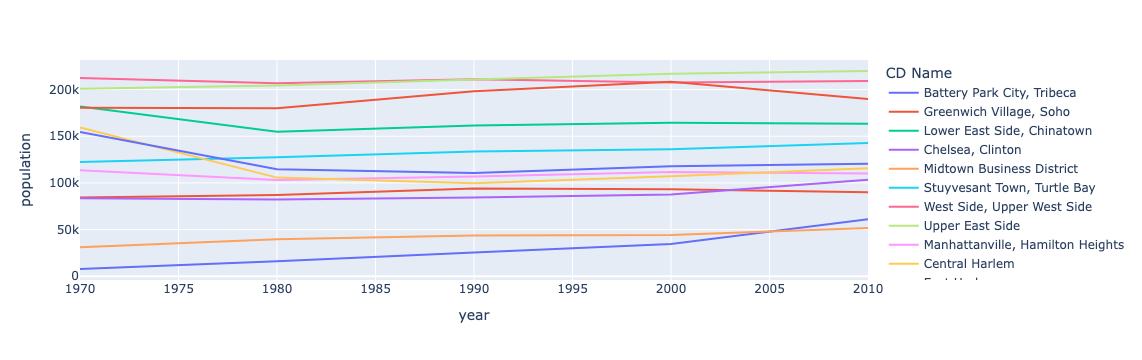

In [9]:
manhattan = populations[populations["Borough"]=="Manhattan"]

import plotly.express as px
fig = px.line(manhattan, x="year", y="population", color='CD Name')
fig

## Step 3

Starting with the same dataset, create a line chart of the population over time for each Borough. There should be one line for each.
1. Use `.groupby()` and `.sum()`
   -  `.groupby(["xxx","xxx"])`
2. Convert the series into dataframe `reset_index()`
3. `px.line()`

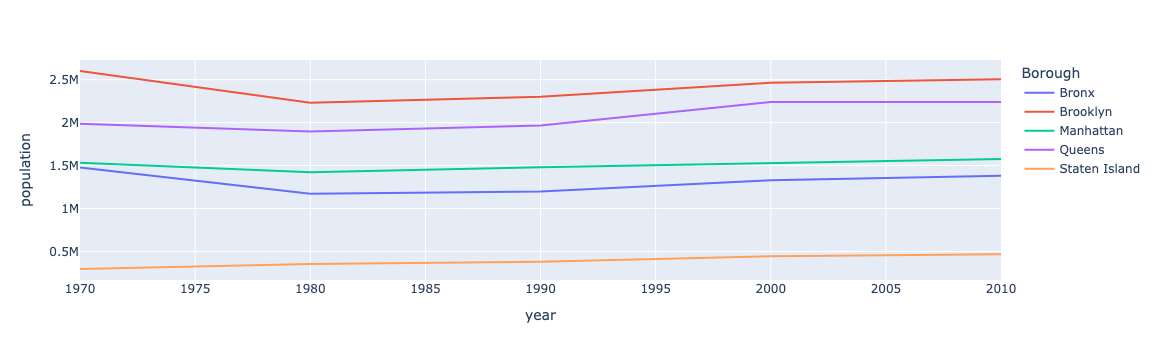

In [51]:
population_sum = populations.groupby(["Borough","year"]).sum() 
population_sum = population_sum.reset_index()
fig2 = px.line(population_sum, x="year", y="population", color='Borough')
fig2

## Step 4

Submit via Gradescope.